# Collectibles and triggers dev

In [35]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import sys
sys.path.append("../../")
import westworld

# First collectible env

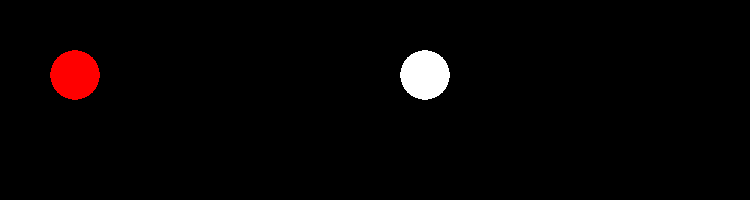

In [56]:
from westworld.environment.grid import GridEnvironment
from westworld.agents.grid import BaseAgent,BaseObstacle,BaseTrigger,BaseCollectible
from westworld.simulation.simulation import Simulation
from westworld.colors import *

BOX_SIZE = 50

class Agent(BaseAgent):
    
    def init(self):
        self.coll = 0
    
    def step(self):
        self.move(dx = 1)
        
class Collectible(BaseCollectible):
    
    def on_collision(self,objects):
        obj = self.env[objects[0]]
        obj.coll += 1
        
        
        

agents = [Agent(1,1,1,1,color = RED,circle = True)]
triggers = [Collectible(8,1,1,1,color = WHITE,circle = True)]


# Setup grid
env = GridEnvironment(BOX_SIZE,15,4,objects = agents + triggers)
env.render()
env.get_img()

In [79]:
%%time
env.get_random_available_pos()

Wall time: 0 ns


(1, 11)

In [42]:
sim = Simulation(env)

In [43]:
sim.run_episode(10,save = "toy_pathfinding.gif",replay = True,fps_replay=10)

[INFO] Saving gif at ./captures/toy_pathfinding.gif



interactive(children=(Play(value=0, description='Press play', max=10), Output()), _dom_classes=('widget-intera…

IntSlider(value=0, max=10)

# More complicated collectible environment

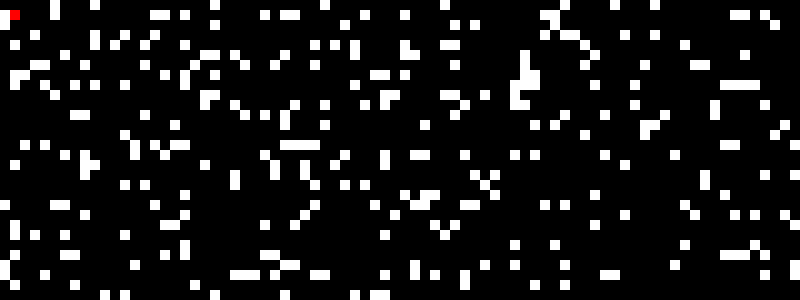

In [185]:
from westworld.environment.grid import GridEnvironment
from westworld.agents.grid import BaseAgent,BaseObstacle,BaseTrigger,BaseCollectible
from westworld.simulation.simulation import Simulation
from westworld.colors import *

BOX_SIZE = 10

class Agent(BaseAgent):
    
    def init(self):
        self.coll = 0
        self.target = None
    
    def step(self):
#         self.move(dx = 1,dy = 1)
#         self.move_towards(x = 10,y = 20,n = 10)
        
        stop = False
        
        # Decide if reached the target
        if self.pos == self.target:
            self.target = None

        # Find next target
        if self.target is None:
            targets = self.env.find_objects({"collectible":True},return_pos = True)
            if len(targets) == 0:
                stop = True
            else:
                stop = False
                self.target = targets[0]
        
        if not stop:
            # Move one step closer towards target using pathfinding
            x,y = self.target
            self.move_towards(x = x,y = y,n = 10)
        
        
class Collectible(BaseCollectible):
    
    collectible = True
    
    def on_collision(self,objects):
        obj = self.env[objects[0]]
        obj.coll += 1
        
        
        

agents = [Agent(1,1,1,1,color = RED)]
collectible_spawner = lambda x,y : Collectible(x,y,1,1,color = WHITE)


# Setup grid
env = GridEnvironment(BOX_SIZE,80,30,objects = agents)
env.spawn(collectible_spawner,300)
env.render()
env.get_img()

In [186]:
sim = Simulation(env)
sim.run_episode(200,save = "toy_pathfinding.gif",replay = True,fps_replay=20)

[INFO] Saving gif at ./captures/toy_pathfinding.gif



interactive(children=(Play(value=0, description='Press play', interval=50, max=200), Output()), _dom_classes=(…

IntSlider(value=0, max=200)